<a href="https://colab.research.google.com/github/SreenidhiCodes/pandas-sales-visualizer/blob/main/task5_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze sales data using Pandas

In [6]:
#Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
#Adding few more data to the dataset
file_name = "/content/sales_data_50.csv"

if not os.path.exists(file_name):

    print("No CSV found — creating sample dataset...")
    import random
    from datetime import datetime, timedelta

    products = ["Laptop", "Mobile", "Tablet", "Headphones", "Smartwatch"]
    months = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]

    data_extended = []
    start_date = datetime(2025, 1, 1)
    for _ in range(50):
        random_days = random.randint(0, 364)
        date = start_date + timedelta(days=random_days)
        data_extended.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Month": date.strftime("%B"),
            "Product": random.choice(products),
            "Sales": random.randint(500, 3000)
        })

In [8]:
# Load CSV file
df = pd.read_csv("/content/sales_data_50.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     50 non-null     object
 1   Month    50 non-null     object
 2   Product  50 non-null     object
 3   Sales    50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


,Sales
count,50.000000
mean,1718.620000
std,642.493799
min,503.000000
25%,1134.500000
50%,1834.500000
75%,2255.500000
max,2730.000000


In [9]:
# Group by Product and sum sales
sales_by_product = df.groupby("Product")["Sales"].sum().reset_index()
print("\nTotal Sales by Product:")
print(sales_by_product)


Total Sales by Product:
      Product  Sales
0  Headphones  17592
1      Laptop   8161
2      Mobile  19143
3  Smartwatch  24432
4      Tablet  16603


In [10]:
# Group by Month and sum sales
sales_by_month = df.groupby("Month")["Sales"].sum().reset_index()
print("\nTotal Sales by Month:")
print(sales_by_month)


Total Sales by Month:
        Month  Sales
0       April   5075
1      August   5081
2    December  10355
3    February   4300
4     January   9091
5        July   5914
6        June   6587
7       March   4161
8         May   3054
9    November   9464
10    October   8914
11  September  13935


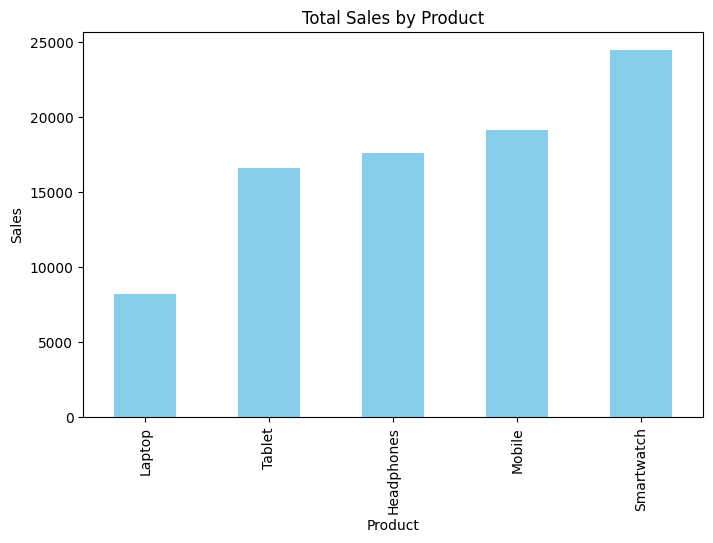

In [13]:
# Sales by Product Using Bar graph
plt.figure(figsize=(8,5))
df.groupby("Product")["Sales"].sum().sort_values().plot(kind="bar", color="skyblue")
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()

<Figure size 800x500 with 0 Axes>

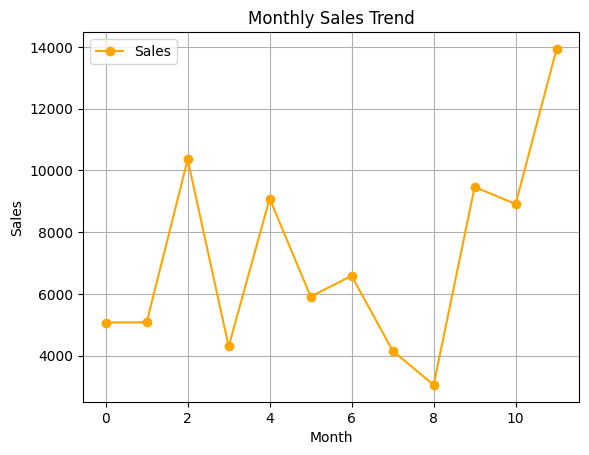

In [14]:
# Monthly Sales Trend Using Line Chart
plt.figure(figsize=(8,5))
sales_by_month.plot(kind="line", marker="o", color="orange")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

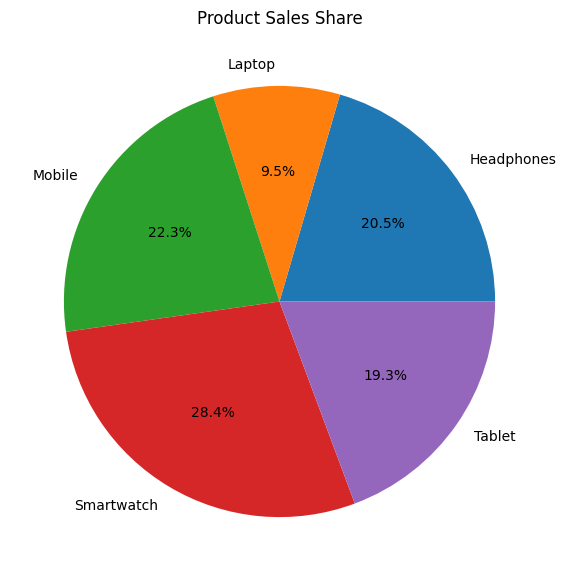

In [15]:
# Product Sales Share Using Pie Chart
plt.figure(figsize=(7,7))
df.groupby("Product")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Product Sales Share")
plt.ylabel("")
plt.show()

<Figure size 800x500 with 0 Axes>

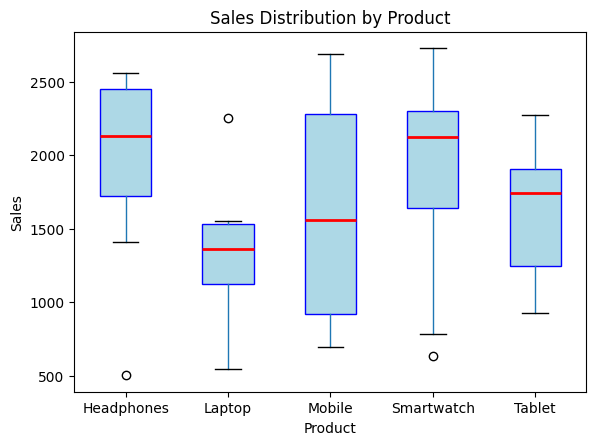

In [16]:
#Sales Distribution by Product Using Boxplot
plt.figure(figsize=(8,5))
df.boxplot(column="Sales", by="Product", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="blue"),
           medianprops=dict(color="red", linewidth=2))
plt.title("Sales Distribution by Product")
plt.suptitle("")  # Remove automatic extra title
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()